# Import

### Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the data

In [3]:
# importing the data
df= pd.read_csv('Churn.csv')

### Understanding the data

In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
print(df['gender'].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64


In [9]:
df['SeniorCitizen'].value_counts(normalize=True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

In [10]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [11]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [12]:
df['MultipleLines'].value_counts(normalize=True)

No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64

In [13]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [14]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [15]:
df['PaymentMethod'].value_counts(normalize=True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

In [16]:
df['MonthlyCharges'].median()

70.35

In [17]:
s = df.isnull().sum()
s [ s > 0]

Series([], dtype: int64)

In [18]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [19]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [20]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

### Data Manipulation

In [22]:
#Replacing "No phone service" with "No"
df.loc[ df['MultipleLines'] == 'No phone service', 'MultipleLines'] = 'No'

In [23]:
#Replacing "No internet service" with "No"
df.loc[ df['OnlineSecurity'] == 'No internet service', 'OnlineSecurity'] = 'No'
df.loc[ df['OnlineBackup'] == 'No internet service', 'OnlineBackup'] = 'No'
df.loc[ df['DeviceProtection'] == 'No internet service', 'DeviceProtection'] = 'No'
df.loc[ df['TechSupport'] == 'No internet service', 'TechSupport'] = 'No'
df.loc[ df['StreamingTV'] == 'No internet service', 'StreamingTV'] = 'No'
df.loc[ df['StreamingMovies'] == 'No internet service', 'StreamingMovies'] = 'No'

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
#taking all the features into a new data frame
features = ['gender','SeniorCitizen','tenure','Partner','Dependents','PhoneService','MultipleLines',
            'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
            'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges',
            'Churn']
cr = df.loc[:, features]

In [26]:
cr.shape

(7043, 20)

In [27]:
cr.head()

,gender,SeniorCitizen,tenure,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,34,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,2,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,45,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,2,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
cr['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [29]:
cr['OnlineBackup'].value_counts()

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64

In [30]:
# Replacing Female with 0 and Male with 
cr['gender'].replace(to_replace =['Female','Male'], value=[0,1],inplace=True)

In [31]:
# Here 0 refers to no internet service, 1 refers to fiber optic and 2 refers to DSL
cr['InternetService'].replace(to_replace =['No','Fiber optic','DSL'], value=[0,1,2],inplace=True)

In [32]:
# Here 0 denotes Month-Month contract, 1 denotes 1 year contract, 2 denotes 2 year contract
cr['Contract'].replace(to_replace =['Month-to-month','One year','Two year'], value=[0,1,2],inplace=True)

In [33]:
# Replacing these potential predictors values ie. no and yes with 0 and 1 respectively
cr['Partner'].replace(to_replace =['No','Yes'], value=[0,1],inplace=True)
cr['Dependents'].replace(to_replace =['No','Yes'], value=[0,1],inplace=True)
cr['Churn'].replace(to_replace =['No','Yes'], value=[0,1],inplace=True)
cr['PhoneService'].replace(to_replace =['No','Yes'], value=[0,1],inplace=True)
cr['MultipleLines'].replace(to_replace =['No','Yes'], value=[0,1],inplace=True)
cr['OnlineSecurity'].replace(to_replace =['No','Yes'], value=[0,1],inplace=True)
cr['OnlineBackup'].replace(to_replace =['No','Yes'], value=[0,1],inplace=True)
cr['DeviceProtection'].replace(to_replace =['No','Yes'], value=[0,1],inplace=True)
cr['TechSupport'].replace(to_replace =['No','Yes'], value=[0,1],inplace=True)
cr['StreamingTV'].replace(to_replace =['No','Yes'], value=[0,1],inplace=True)
cr['StreamingMovies'].replace(to_replace =['No','Yes'], value=[0,1],inplace=True)
cr['PaperlessBilling'].replace(to_replace =['No','Yes'], value=[0,1],inplace=True)

In [34]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
tenure              7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(17), object(1)
memory usage: 1.1+ MB


In [35]:
cr.shape

(7043, 20)

In [36]:
cr.columns

Index(['gender', 'SeniorCitizen', 'tenure', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Data Visualization 

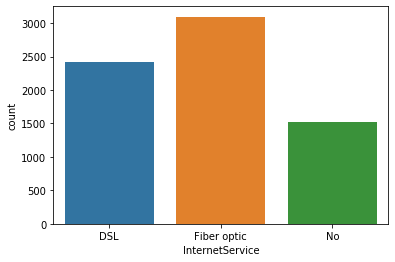

In [37]:
sns.countplot(x="InternetService", data=df )
# its clear that more no. of users use fibre optic internet service

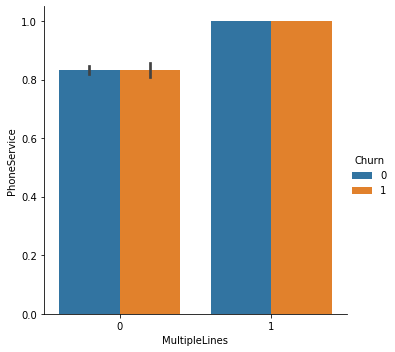

In [38]:
sns.catplot(y="PhoneService",x="MultipleLines", hue="Churn", data=cr, kind="bar") 

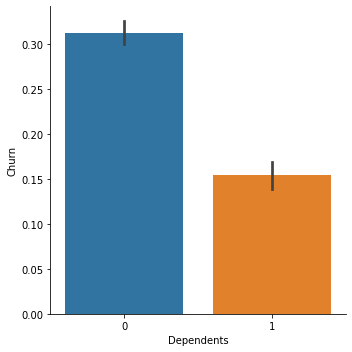

In [39]:
sns.catplot(x="Dependents",y="Churn", data=cr, kind="bar") 

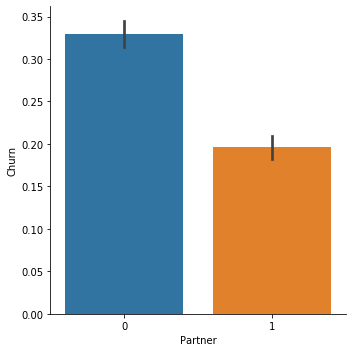

In [40]:
sns.catplot(x="Partner",y="Churn", data=cr, kind="bar") 

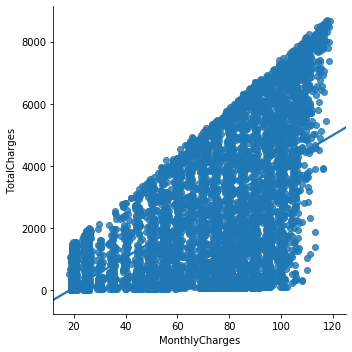

In [41]:
sns.lmplot(x="MonthlyCharges", y = "TotalCharges",data = cr,ci=False) 

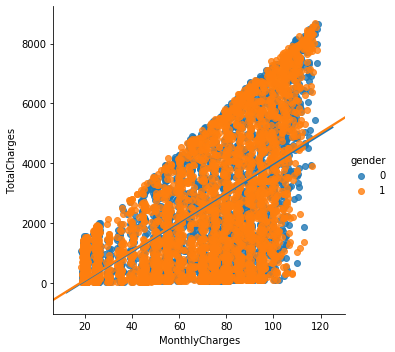

In [42]:
sns.lmplot(x="MonthlyCharges", y = "TotalCharges", hue='gender',data = cr,ci=False) 

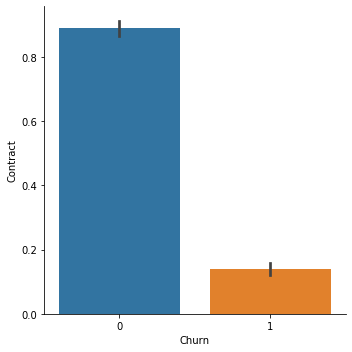

In [43]:
sns.catplot(y="Contract",x="Churn",  data=cr, kind="bar")

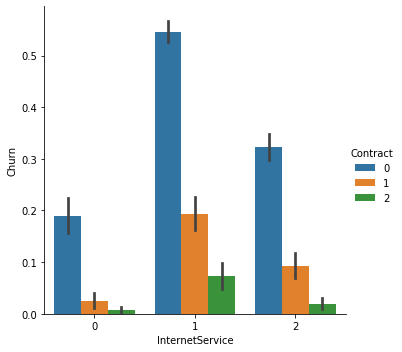

In [44]:
sns.catplot(x="InternetService",y="Churn", hue="Contract", data=cr, kind="bar")

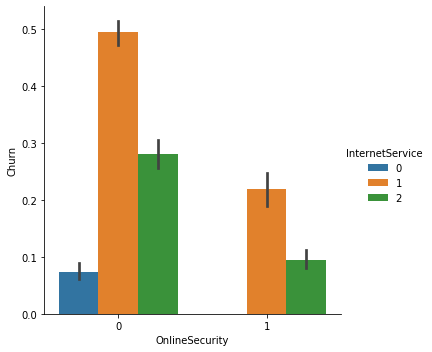

In [45]:
sns.catplot(hue="InternetService",x="OnlineSecurity", y="Churn", data=cr, kind="bar")

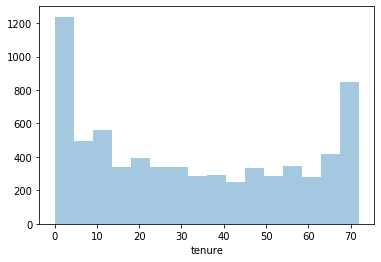

In [46]:
sns.distplot(cr['tenure'], kde=False)

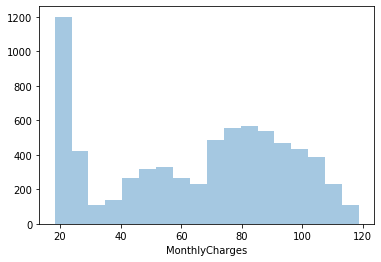

In [47]:
sns.distplot(cr['MonthlyCharges'], kde=False)

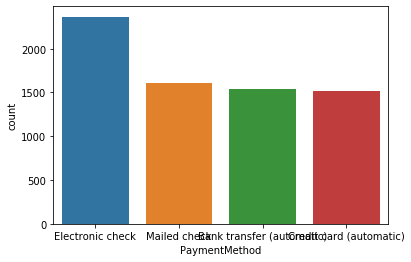

In [48]:
sns.countplot(x="PaymentMethod", data=df)

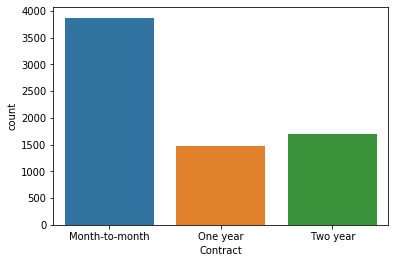

In [49]:
sns.countplot(x="Contract", data=df)

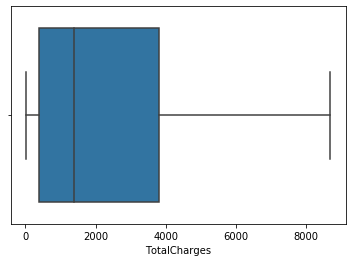

In [50]:
sns.boxplot(df['TotalCharges'])

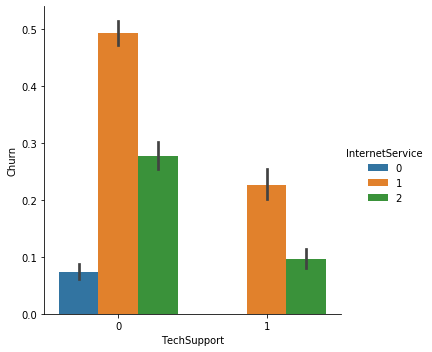

In [51]:
sns.catplot(x="TechSupport", y="Churn", hue='InternetService', data=cr, kind="bar")


In [52]:
# Taking the correlation matrix to understand the relationship between variables
matrix = cr.corr()
matrix

,gender,SeniorCitizen,tenure,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,0.005106,-0.001808,0.010517,-0.006488,-0.008414,0.000863,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016567,0.016479,-0.211185,0.008576,0.142948,0.032310,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,0.220173,0.102411,0.150889
tenure,0.005106,0.016567,1.000000,0.379697,0.159712,0.008448,0.331941,0.030359,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,0.247900,0.825880,-0.352229
Partner,-0.001808,0.016479,0.379697,1.000000,0.452676,0.017706,0.142057,-0.000891,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,0.096848,0.319072,-0.150448
Dependents,0.010517,-0.211185,0.159712,0.452676,1.000000,-0.001762,-0.024526,-0.044590,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,-0.113890,0.064653,-0.164221
PhoneService,-0.006488,0.008576,0.008448,0.017706,-0.001762,1.000000,0.279690,-0.387436,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,0.247398,0.113008,0.011942
MultipleLines,-0.008414,0.142948,0.331941,0.142057,-0.024526,0.279690,1.000000,-0.011124,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,0.490434,0.469042,0.040102
InternetService,0.000863,0.032310,0.030359,-0.000891,-0.044590,-0.387436,-0.011124,1.000000,0.393013,0.314737,0.306805,0.389382,0.242532,0.250343,-0.099721,0.138625,0.323260,0.175691,0.047291
OnlineSecurity,-0.017021,-0.038653,0.327203,0.143106,0.080972,-0.092893,0.098108,0.393013,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,0.296594,0.412619,-0.171226
OnlineBackup,-0.013773,0.066572,0.360277,0.141498,0.023671,-0.052312,0.202237,0.314737,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,0.441780,0.510100,-0.082255


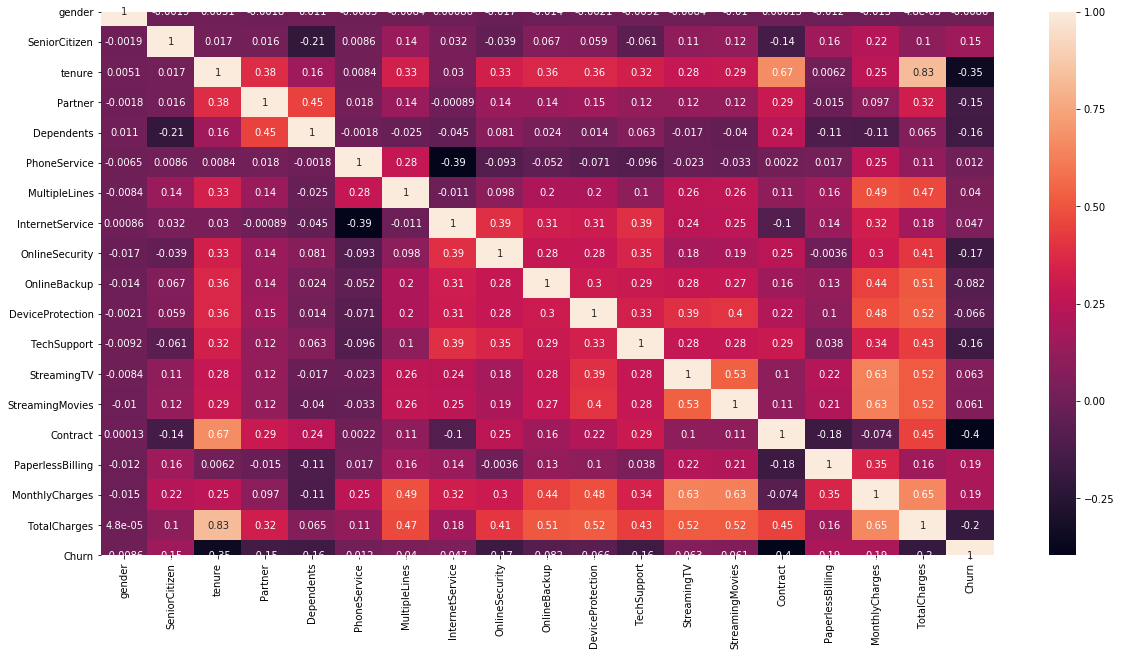

In [53]:
# Understanding correlations with the help of heatmap
sns.heatmap(matrix, annot=True)
plt.gcf().set_size_inches(20,10)

In [54]:
cr = cr.dropna()
cr.shape

(7032, 20)

## Implement Machine Learning Models

In [55]:
cr=pd.get_dummies(cr)
cr.shape

(7032, 23)

In [56]:
y = cr['Churn']
X = cr.drop(columns=['Churn','TechSupport','Partner','Dependents'])

In [57]:
X.shape,y.shape

((7032, 19), (7032,))

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.43, random_state=0)

### Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

G:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [62]:
print('TRAIN SCORE ', model.score(X_train,y_train))
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 SCORE: {r2score:0.2f}")

TRAIN SCORE  0.8486975378519013
R2 SCORE: 0.19


### Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
y_pred = model.predict(X_test)

In [66]:
model.score(X_test,y_test)

0.2795868529873151

In [67]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 0.14
Mean Absolute Error : 0.30
R2 Score: 0.28


### S G D

In [68]:
from sklearn.linear_model import SGDRegressor
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
model.score(X_test,y_test)

0.2795868529873151

## Build Model using Logistic Regression

In [70]:
# Importing packages logistic regression and evaluation 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [73]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

G:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
y_pred = clf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score : ',score)


Accuracy_score :  0.8005952380952381


## Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [77]:
model.score(X_train,y_train)

0.998253493013972

In [78]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)

accuracy_score 0.7212301587301587


### SVM

In [79]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

G:\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [80]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)

accuracy_score 0.7668650793650794


### Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [82]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)

accuracy_score 0.7642195767195767


### Model Evaluation

#### Cross Validation for Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [84]:
model = LogisticRegression(random_state=1)
scores= cross_val_score(model, X, y, cv=5)

G:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [85]:
print(f'Accuracy_score={score.mean() * 100}')

Accuracy_score=76.42195767195767


### Final Conclusions